# AWS Tables feature
### Author: Ashish Kumar

https://docs.aws.amazon.com/textract/latest/dg/how-it-works-tables.html

Amazon Textract can extract tables in a document, and extract cells, merged cells, and column headers within a table. For example, when the following table is detected in a document, Amazon Textract detects a table with thirty cells, 3 merged cells, and 5 cells that are column headers.

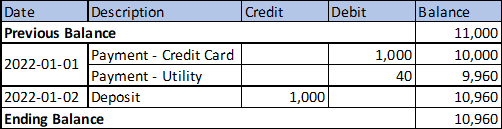

Detected tables are returned as Block objects in the responses from AnalyzeDocument and GetDocumentAnalysis. You can use the FeatureTypes input parameter to retrieve information about key-value pairs, tables, or both. For tables only, use the value TABLES. For an example, see Exporting Tables into a CSV File. For general information about how a document is represented by Block objects, see Text Detection and Document Analysis Response Objects.

The following diagram shows how a single cell in a table is represented by Block objects.

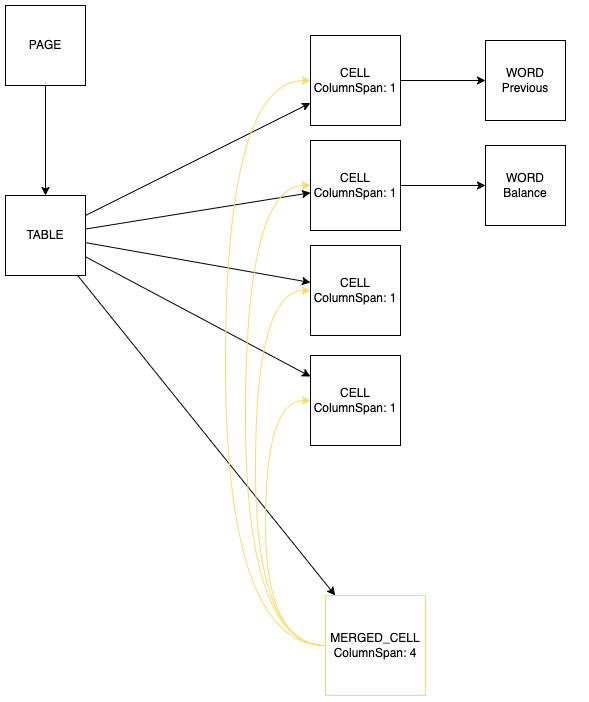

Please refer below AWS Docs for AWS Tables Python code examples:

https://docs.aws.amazon.com/textract/latest/dg/examples-export-table-csv.html



In [1]:
import webbrowser, os
import json
import boto3
import io
from io import BytesIO
import sys
from pprint import pprint


def get_rows_columns_map(table_result, blocks_map):
    rows = {}
    for relationship in table_result['Relationships']:
        if relationship['Type'] == 'CHILD':
            for child_id in relationship['Ids']:
                cell = blocks_map[child_id]
                if cell['BlockType'] == 'CELL':
                    row_index = cell['RowIndex']
                    col_index = cell['ColumnIndex']
                    if row_index not in rows:
                        # create new row
                        rows[row_index] = {}
                        
                    # get the text value
                    rows[row_index][col_index] = get_text(cell, blocks_map)
    return rows


def get_text(result, blocks_map):
    text = ''
    if 'Relationships' in result:
        for relationship in result['Relationships']:
            if relationship['Type'] == 'CHILD':
                for child_id in relationship['Ids']:
                    word = blocks_map[child_id]
                    if word['BlockType'] == 'WORD':
                        text += word['Text'] + ' '
                    if word['BlockType'] == 'SELECTION_ELEMENT':
                        if word['SelectionStatus'] =='SELECTED':
                            text +=  'X '    
    return text


def get_table_csv_results(file_name):

    with open(file_name, 'rb') as file:
        img_test = file.read()
        bytes_test = bytearray(img_test)
        print('Image loaded', file_name)

    # process using image bytes
    # get the results
    client = boto3.client('textract')

    response = client.analyze_document(Document={'Bytes': bytes_test}, FeatureTypes=['TABLES'])

    # Get the text blocks
    blocks=response['Blocks']
    pprint(blocks)

    blocks_map = {}
    table_blocks = []
    for block in blocks:
        blocks_map[block['Id']] = block
        if block['BlockType'] == "TABLE":
            table_blocks.append(block)

    if len(table_blocks) <= 0:
        return "<b> NO Table FOUND </b>"

    csv = ''
    for index, table in enumerate(table_blocks):
        csv += generate_table_csv(table, blocks_map, index +1)
        csv += '\n\n'

    return csv

def generate_table_csv(table_result, blocks_map, table_index):
    rows = get_rows_columns_map(table_result, blocks_map)

    table_id = 'Table_' + str(table_index)
    
    # get cells.
    csv = 'Table: {0}\n\n'.format(table_id)

    for row_index, cols in rows.items():
        
        for col_index, text in cols.items():
            csv += '{}'.format(text) + ","
        csv += '\n'
        
    csv += '\n\n\n'
    return csv


table_csv = get_table_csv_results('mediumchart_1.png')

output_file = 'table_output.csv'

# replace content
with open(output_file, "wt") as fout:
    fout.write(table_csv)

Image loaded mediumchart_1.png
[{'BlockType': 'PAGE',
  'Geometry': {'BoundingBox': {'Height': 0.9888013601303101,
                               'Left': 0.0,
                               'Top': 0.0,
                               'Width': 1.0},
               'Polygon': [{'X': 8.613025784143247e-06, 'Y': 0.0},
                           {'X': 1.0, 'Y': 0.004514229018241167},
                           {'X': 1.0, 'Y': 0.9888013601303101},
                           {'X': 0.0, 'Y': 0.983191728591919}]},
  'Id': 'ae08c189-3755-40a3-82bb-fe0f8fd7a386',
  'Relationships': [{'Ids': ['11497bff-3172-46f2-b51d-fb9a0c853568',
                             '286c5b8d-8935-4f53-8b8a-306a5154c5ab',
                             '56687172-f774-4250-8602-9ad8e51e31ac',
                             'c8dce6bf-94d2-42b9-af55-c2144a8aabca',
                             '2542c1a3-9a96-4ccc-a0db-96eb61b7db79',
                             '2acc7396-6150-461c-9712-53aef5a83fab',
                            

  'Geometry': {'BoundingBox': {'Height': 0.0075032575987279415,
                               'Left': 0.08019676804542542,
                               'Top': 0.29291480779647827,
                               'Width': 0.046281930059194565},
               'Polygon': [{'X': 0.08022407442331314, 'Y': 0.29291480779647827},
                           {'X': 0.12647868692874908, 'Y': 0.29320740699768066},
                           {'X': 0.12645253539085388, 'Y': 0.30041804909706116},
                           {'X': 0.08019676804542542,
                            'Y': 0.3001258075237274}]},
  'Id': '4d7e7ed0-26f6-4541-b366-665f46d75355',
  'Relationships': [{'Ids': ['3b3cbc41-8446-47e2-aabd-87ed7dd06229'],
                     'Type': 'CHILD'}],
  'Text': 'Indication'},
 {'BlockType': 'LINE',
  'Confidence': 75.30219268798828,
  'Geometry': {'BoundingBox': {'Height': 0.023706916719675064,
                               'Left': 0.0822954997420311,
                               'Top': 

 {'BlockType': 'LINE',
  'Confidence': 99.81597137451172,
  'Geometry': {'BoundingBox': {'Height': 0.006815416272729635,
                               'Left': 0.4044860005378723,
                               'Top': 0.410506010055542,
                               'Width': 0.027277154847979546},
               'Polygon': [{'X': 0.404503732919693, 'Y': 0.410506010055542},
                           {'X': 0.4317631721496582, 'Y': 0.410675048828125},
                           {'X': 0.4317460358142853, 'Y': 0.41732141375541687},
                           {'X': 0.4044860005378723, 'Y': 0.4171525537967682}]},
  'Id': 'a07e1c69-fd37-4068-b98c-7924b6c8c1a0',
  'Relationships': [{'Ids': ['a41f301c-5d35-41ba-a1e5-aef32891b999'],
                     'Type': 'CHILD'}],
  'Text': 'Route'},
 {'BlockType': 'LINE',
  'Confidence': 99.50714874267578,
  'Geometry': {'BoundingBox': {'Height': 0.00887409970164299,
                               'Left': 0.08308646827936172,
                          

  'Relationships': [{'Ids': ['c6b6f9f1-7f65-442c-9691-eb48cf0e9232'],
                     'Type': 'CHILD'}],
  'Text': 'Route'},
 {'BlockType': 'LINE',
  'Confidence': 99.76238250732422,
  'Geometry': {'BoundingBox': {'Height': 0.008987999521195889,
                               'Left': 0.14351564645767212,
                               'Top': 0.567876935005188,
                               'Width': 0.11469846963882446},
               'Polygon': [{'X': 0.1435452252626419, 'Y': 0.567876935005188},
                           {'X': 0.2582141160964966, 'Y': 0.5685685276985168},
                           {'X': 0.25818780064582825, 'Y': 0.5768649578094482},
                           {'X': 0.14351564645767212,
                            'Y': 0.5761744379997253}]},
  'Id': 'e9f92ba9-2805-43a6-8ab8-d615663d126b',
  'Relationships': [{'Ids': ['c8117bc9-3428-4bef-a9ef-13f995837e43',
                             'd79f8428-6751-439d-8bd0-a658faa0a38b',
                             '8f51f6f

  'Geometry': {'BoundingBox': {'Height': 0.007077555172145367,
                               'Left': 0.35746651887893677,
                               'Top': 0.7169477343559265,
                               'Width': 0.03688133507966995},
               'Polygon': [{'X': 0.35748592019081116, 'Y': 0.7169477343559265},
                           {'X': 0.3943478465080261, 'Y': 0.717164158821106},
                           {'X': 0.39432933926582336, 'Y': 0.7240252494812012},
                           {'X': 0.35746651887893677,
                            'Y': 0.7238090634346008}]},
  'Id': '3f51dc83-154c-467e-b0cf-a7cdb16a1114',
  'Relationships': [{'Ids': ['e5b8d305-03f0-4eae-b2d5-b48ee079cc7f'],
                     'Type': 'CHILD'}],
  'Text': 'Contact'},
 {'BlockType': 'LINE',
  'Confidence': 99.95915985107422,
  'Geometry': {'BoundingBox': {'Height': 0.008199024945497513,
                               'Left': 0.4084838926792145,
                               'Top': 0.723152518

                     'Type': 'CHILD'}],
  'Text': 'PRN'},
 {'BlockType': 'LINE',
  'Confidence': 89.6761703491211,
  'Geometry': {'BoundingBox': {'Height': 0.007161907851696014,
                               'Left': 0.08685581386089325,
                               'Top': 0.8940628170967102,
                               'Width': 0.04559560865163803},
               'Polygon': [{'X': 0.08688174188137054, 'Y': 0.8940628170967102},
                           {'X': 0.13245141506195068, 'Y': 0.8943216800689697},
                           {'X': 0.13242657482624054, 'Y': 0.9012247323989868},
                           {'X': 0.08685581386089325, 'Y': 0.900966227054596}]},
  'Id': 'c7354b67-32ac-4f69-a268-c870ab78d6c8',
  'Relationships': [{'Ids': ['6e8b8deb-70fb-4c91-8a00-372a81518613'],
                     'Type': 'CHILD'}],
  'Text': 'Indication'},
 {'BlockType': 'LINE',
  'Confidence': 99.89618682861328,
  'Geometry': {'BoundingBox': {'Height': 0.008190024644136429,
                 

  'TextType': 'PRINTED'},
 {'BlockType': 'WORD',
  'Confidence': 99.47390747070312,
  'Geometry': {'BoundingBox': {'Height': 0.02132805995643139,
                               'Left': 0.1803910732269287,
                               'Top': 0.13682924211025238,
                               'Width': 0.07541056722402573},
               'Polygon': [{'X': 0.18046283721923828, 'Y': 0.13682924211025238},
                           {'X': 0.25580164790153503, 'Y': 0.13731849193572998},
                           {'X': 0.2557353079319, 'Y': 0.15815730392932892},
                           {'X': 0.1803910732269287,
                            'Y': 0.15766969323158264}]},
  'Id': 'dbc34c51-cf2a-4456-a49f-c271ae03ca3b',
  'Text': 'Megan',
  'TextType': 'HANDWRITING'},
 {'BlockType': 'WORD',
  'Confidence': 99.972900390625,
  'Geometry': {'BoundingBox': {'Height': 0.015547127462923527,
                               'Left': 0.5913949012756348,
                               'Top': 0.1418867260

  'Confidence': 99.89998626708984,
  'Geometry': {'BoundingBox': {'Height': 0.007947397418320179,
                               'Left': 0.24721485376358032,
                               'Top': 0.24280808866024017,
                               'Width': 0.02934422343969345},
               'Polygon': [{'X': 0.24723978340625763, 'Y': 0.24280808866024017},
                           {'X': 0.27655908465385437, 'Y': 0.24299515783786774},
                           {'X': 0.27653494477272034, 'Y': 0.2507554888725281},
                           {'X': 0.24721485376358032,
                            'Y': 0.2505686581134796}]},
  'Id': 'e8e1ef9d-256b-4796-8a4a-353ed9d46de9',
  'Text': 'name)',
  'TextType': 'PRINTED'},
 {'BlockType': 'WORD',
  'Confidence': 99.82229614257812,
  'Geometry': {'BoundingBox': {'Height': 0.014556554146111012,
                               'Left': 0.08545005321502686,
                               'Top': 0.24856427311897278,
                               'Widt

                           {'X': 0.43566006422042847,
                            'Y': 0.31749582290649414}]},
  'Id': '150204f8-5397-4fa1-94a0-fc3fc7c2a969',
  'Text': 'or',
  'TextType': 'HANDWRITING'},
 {'BlockType': 'WORD',
  'Confidence': 61.73139953613281,
  'Geometry': {'BoundingBox': {'Height': 0.007519114762544632,
                               'Left': 0.4595555067062378,
                               'Top': 0.30964982509613037,
                               'Width': 0.018436625599861145},
               'Polygon': [{'X': 0.4595738649368286, 'Y': 0.30964982509613037},
                           {'X': 0.47799214720726013, 'Y': 0.3097660541534424},
                           {'X': 0.4779742658138275, 'Y': 0.3171689510345459},
                           {'X': 0.4595555067062378, 'Y': 0.3170528709888458}]},
  'Id': '6bdbd90f-80c7-489c-b797-ab81f3b5b6c1',
  'Text': 'Ora',
  'TextType': 'HANDWRITING'},
 {'BlockType': 'WORD',
  'Confidence': 97.24518585205078,
  'Geometry': {'Boun

                               'Left': 0.08309083431959152,
                               'Top': 0.4192926287651062,
                               'Width': 0.048765867948532104},
               'Polygon': [{'X': 0.08311777561903, 'Y': 0.4192926287651062},
                           {'X': 0.13185669481754303, 'Y': 0.41959431767463684},
                           {'X': 0.13183096051216125, 'Y': 0.42673051357269287},
                           {'X': 0.08309083431959152,
                            'Y': 0.4264291822910309}]},
  'Id': '2bd8fe69-78e6-4ad6-ba5d-37560feda3e0',
  'Text': 'Prescriber',
  'TextType': 'PRINTED'},
 {'BlockType': 'WORD',
  'Confidence': 99.69596862792969,
  'Geometry': {'BoundingBox': {'Height': 0.007919310592114925,
                               'Left': 0.13364098966121674,
                               'Top': 0.4202474355697632,
                               'Width': 0.04360358044505119},
               'Polygon': [{'X': 0.13366854190826416, 'Y': 0.4202474355

  'Geometry': {'BoundingBox': {'Height': 0.005945140030235052,
                               'Left': 0.3313119113445282,
                               'Top': 0.5678573250770569,
                               'Width': 0.018728282302618027},
               'Polygon': [{'X': 0.3313289284706116, 'Y': 0.5678573250770569},
                           {'X': 0.3500401973724365, 'Y': 0.5679702162742615},
                           {'X': 0.3500235378742218, 'Y': 0.5738024711608887},
                           {'X': 0.3313119113445282, 'Y': 0.5736896991729736}]},
  'Id': '2ff39f47-9241-4d7f-a111-a3064873e4d7',
  'Text': 'PRN',
  'TextType': 'PRINTED'},
 {'BlockType': 'WORD',
  'Confidence': 97.95098114013672,
  'Geometry': {'BoundingBox': {'Height': 0.006312473211437464,
                               'Left': 0.35151299834251404,
                               'Top': 0.5677335858345032,
                               'Width': 0.031856320798397064},
               'Polygon': [{'X': 0.35153043270

 {'BlockType': 'WORD',
  'Confidence': 97.33615112304688,
  'Geometry': {'BoundingBox': {'Height': 0.006697440054267645,
                               'Left': 0.0857308954000473,
                               'Top': 0.6950465440750122,
                               'Width': 0.04612027108669281},
               'Polygon': [{'X': 0.08575507253408432, 'Y': 0.6950465440750122},
                           {'X': 0.1318511664867401, 'Y': 0.6953182220458984},
                           {'X': 0.13182801008224487, 'Y': 0.7017439603805542},
                           {'X': 0.0857308954000473, 'Y': 0.7014725804328918}]},
  'Id': 'f56a6b76-e365-4672-b0fc-66316c619fd7',
  'Text': 'Indication',
  'TextType': 'PRINTED'},
 {'BlockType': 'WORD',
  'Confidence': 99.82740020751953,
  'Geometry': {'BoundingBox': {'Height': 0.008197258226573467,
                               'Left': 0.24563229084014893,
                               'Top': 0.6949058771133423,
                               'Width': 0.0

  'Geometry': {'BoundingBox': {'Height': 0.008098617196083069,
                               'Left': 0.21140585839748383,
                               'Top': 0.8667973875999451,
                               'Width': 0.046436917036771774},
               'Polygon': [{'X': 0.21143193542957306, 'Y': 0.8667973875999451},
                           {'X': 0.2578427791595459, 'Y': 0.8670623898506165},
                           {'X': 0.25781795382499695, 'Y': 0.8748959898948669},
                           {'X': 0.21140585839748383, 'Y': 0.874631404876709}]},
  'Id': '01c13bf7-7ccb-4461-b709-922a02640e4c',
  'Text': 'frequency',
  'TextType': 'PRINTED'},
 {'BlockType': 'WORD',
  'Confidence': 99.1909408569336,
  'Geometry': {'BoundingBox': {'Height': 0.006024757865816355,
                               'Left': 0.31166645884513855,
                               'Top': 0.8659325242042542,
                               'Width': 0.018114347010850906},
               'Polygon': [{'X': 0.311

                           {'X': 0.5062958002090454,
                            'Y': 0.26717087626457214}]},
  'Id': 'ea4e9462-4eb2-47bc-9ab3-77c95b804b78',
  'RowIndex': 1,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 6,
  'ColumnSpan': 1,
  'Confidence': 80.489501953125,
  'EntityTypes': ['COLUMN_HEADER'],
  'Geometry': {'BoundingBox': {'Height': 0.026635687798261642,
                               'Left': 0.5304424166679382,
                               'Top': 0.24083831906318665,
                               'Width': 0.023598844185471535},
               'Polygon': [{'X': 0.530501663684845, 'Y': 0.24083831906318665},
                           {'X': 0.5540412664413452, 'Y': 0.2409886121749878},
                           {'X': 0.5539842247962952, 'Y': 0.2674739956855774},
                           {'X': 0.5304424166679382, 'Y': 0.2673243582248688}]},
  'Id': '2d75bf44-ff0e-47f4-ac12-f76eb73980f3',
  'RowIndex': 1,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnI

  'RowIndex': 3,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 11,
  'ColumnSpan': 1,
  'Confidence': 69.75088500976562,
  'EntityTypes': ['COLUMN_HEADER'],
  'Geometry': {'BoundingBox': {'Height': 0.02454799972474575,
                               'Left': 0.6462329626083374,
                               'Top': 0.2959413230419159,
                               'Width': 0.023582985624670982},
               'Polygon': [{'X': 0.6462777853012085, 'Y': 0.2959413230419159},
                           {'X': 0.6698159575462341, 'Y': 0.2960902154445648},
                           {'X': 0.6697731614112854, 'Y': 0.3204893171787262},
                           {'X': 0.6462329626083374, 'Y': 0.320341020822525}]},
  'Id': 'fc548171-1c37-49c6-93ed-150b40c8802b',
  'RowIndex': 3,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 12,
  'ColumnSpan': 1,
  'Confidence': 78.49150085449219,
  'EntityTypes': ['COLUMN_HEADER'],
  'Geometry': {'BoundingBox': {'Height': 0.02454358525574

                               'Top': 0.368115097284317,
                               'Width': 0.027007846161723137},
               'Polygon': [{'X': 0.4102728068828583, 'Y': 0.368115097284317},
                           {'X': 0.43721136450767517, 'Y': 0.36828339099884033},
                           {'X': 0.43714451789855957, 'Y': 0.3944450914859772},
                           {'X': 0.4102035164833069,
                            'Y': 0.39427754282951355}]},
  'Id': '09953e94-321a-4b2f-aa32-de45f7e7dbc6',
  'Relationships': [{'Ids': ['79e8f8a7-63ad-45f2-a32a-15161ceeff9e'],
                     'Type': 'CHILD'}],
  'RowIndex': 6,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 2,
  'ColumnSpan': 1,
  'Confidence': 80.68827819824219,
  'Geometry': {'BoundingBox': {'Height': 0.02630070224404335,
                               'Left': 0.43714451789855957,
                               'Top': 0.36828339099884033,
                               'Width': 0.022413697093725204}

 {'BlockType': 'CELL',
  'ColumnIndex': 8,
  'ColumnSpan': 1,
  'Confidence': 79.86285400390625,
  'Geometry': {'BoundingBox': {'Height': 0.024135299026966095,
                               'Left': 0.5753469467163086,
                               'Top': 0.42015957832336426,
                               'Width': 0.024205636233091354},
               'Polygon': [{'X': 0.5753968358039856, 'Y': 0.42015957832336426},
                           {'X': 0.599552571773529, 'Y': 0.4203091859817505},
                           {'X': 0.5995047092437744, 'Y': 0.44429489970207214},
                           {'X': 0.5753469467163086,
                            'Y': 0.44414591789245605}]},
  'Id': '1bdd59ff-313d-4592-95d8-9e32fbd3e8eb',
  'RowIndex': 8,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 9,
  'ColumnSpan': 1,
  'Confidence': 80.8563232421875,
  'Geometry': {'BoundingBox': {'Height': 0.024130957201123238,
                               'Left': 0.5995047092437744,
           

 {'BlockType': 'CELL',
  'ColumnIndex': 8,
  'ColumnSpan': 1,
  'Confidence': 79.88499450683594,
  'Geometry': {'BoundingBox': {'Height': 0.026759736239910126,
                               'Left': 0.57524174451828,
                               'Top': 0.4681362211704254,
                               'Width': 0.02421509101986885},
               'Polygon': [{'X': 0.5752970576286316, 'Y': 0.4681362211704254},
                           {'X': 0.599456787109375, 'Y': 0.46828457713127136},
                           {'X': 0.5994036793708801, 'Y': 0.49489593505859375},
                           {'X': 0.57524174451828, 'Y': 0.4947482645511627}]},
  'Id': 'd2d1d2e0-caa4-4e85-96e0-6eae5fbff8f1',
  'RowIndex': 10,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 9,
  'ColumnSpan': 1,
  'Confidence': 80.87873840332031,
  'Geometry': {'BoundingBox': {'Height': 0.026755359023809433,
                               'Left': 0.5994036793708801,
                               'Top': 0.4682

 {'BlockType': 'CELL',
  'ColumnIndex': 11,
  'ColumnSpan': 1,
  'Confidence': 69.5433578491211,
  'Geometry': {'BoundingBox': {'Height': 0.024143552407622337,
                               'Left': 0.6458246111869812,
                               'Top': 0.5187407732009888,
                               'Width': 0.02360033616423607},
               'Polygon': [{'X': 0.645868718624115, 'Y': 0.5187407732009888},
                           {'X': 0.6694249510765076, 'Y': 0.5188841223716736},
                           {'X': 0.6693828701972961, 'Y': 0.5428842902183533},
                           {'X': 0.6458246111869812, 'Y': 0.5427415370941162}]},
  'Id': '16cbd3fb-c243-41fd-bf69-4435ff8f7f85',
  'RowIndex': 12,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 12,
  'ColumnSpan': 1,
  'Confidence': 78.25798034667969,
  'Geometry': {'BoundingBox': {'Height': 0.024139288812875748,
                               'Left': 0.6693828701972961,
                               'Top': 0.5

                               'Left': 0.7623233199119568,
                               'Top': 0.5674498677253723,
                               'Width': 0.04110639542341232},
               'Polygon': [{'X': 0.7623615264892578, 'Y': 0.5674498677253723},
                           {'X': 0.8034297227859497, 'Y': 0.5676977038383484},
                           {'X': 0.8033952713012695, 'Y': 0.5943213701248169},
                           {'X': 0.7623233199119568, 'Y': 0.5940746665000916}]},
  'Id': '18c3d8f7-8b52-4fba-b99f-1aee31d54c13',
  'RowIndex': 14,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 17,
  'ColumnSpan': 1,
  'Confidence': 45.39799880981445,
  'EntityTypes': ['COLUMN_HEADER'],
  'Geometry': {'BoundingBox': {'Height': 0.026743363589048386,
                               'Left': 0.8033952713012695,
                               'Top': 0.5676977038383484,
                               'Width': 0.019963279366493225},
               'Polygon': [{'X': 0.80342972

               'Polygon': [{'X': 0.43651649355888367, 'Y': 0.6401591300964355},
                           {'X': 0.45888426899909973, 'Y': 0.6402923464775085},
                           {'X': 0.45882469415664673, 'Y': 0.6643180847167969},
                           {'X': 0.4364550709724426, 'Y': 0.6641854643821716}]},
  'Id': '60e757db-9c03-436a-97fb-f17f6093c712',
  'RowIndex': 17,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 3,
  'ColumnSpan': 1,
  'Confidence': 60.7435302734375,
  'Geometry': {'BoundingBox': {'Height': 0.024165572598576546,
                               'Left': 0.45882469415664673,
                               'Top': 0.6402923464775085,
                               'Width': 0.023635242134332657},
               'Polygon': [{'X': 0.45888426899909973, 'Y': 0.6402923464775085},
                           {'X': 0.4824599325656891, 'Y': 0.6404327154159546},
                           {'X': 0.48240235447883606, 'Y': 0.6644579172134399},
                 

               'Polygon': [{'X': 0.5530706644058228, 'Y': 0.6915259957313538},
                           {'X': 0.5748322606086731, 'Y': 0.6916544437408447},
                           {'X': 0.574783205986023, 'Y': 0.7152486443519592},
                           {'X': 0.5530198216438293, 'Y': 0.715120792388916}]},
  'Id': 'bf71eca2-5164-4c7d-b360-ce44e3b4de1d',
  'RowIndex': 19,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 8,
  'ColumnSpan': 1,
  'Confidence': 81.28717803955078,
  'Geometry': {'BoundingBox': {'Height': 0.023736314848065376,
                               'Left': 0.574783205986023,
                               'Top': 0.6916544437408447,
                               'Width': 0.024227425456047058},
               'Polygon': [{'X': 0.5748322606086731, 'Y': 0.6916544437408447},
                           {'X': 0.5990106463432312, 'Y': 0.6917970776557922},
                           {'X': 0.5989635586738586, 'Y': 0.7153907418251038},
                         

               'Polygon': [{'X': 0.64546138048172, 'Y': 0.7405715584754944},
                           {'X': 0.6690356731414795, 'Y': 0.7407094240188599},
                           {'X': 0.6689919233322144, 'Y': 0.7656204104423523},
                           {'X': 0.6454156637191772, 'Y': 0.7654831409454346}]},
  'Id': 'dde701e7-0037-4fa3-b469-8c784944e73c',
  'RowIndex': 21,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 12,
  'ColumnSpan': 1,
  'Confidence': 78.53304290771484,
  'Geometry': {'BoundingBox': {'Height': 0.025044720619916916,
                               'Left': 0.6689919233322144,
                               'Top': 0.7407094240188599,
                               'Width': 0.023012373596429825},
               'Polygon': [{'X': 0.6690356731414795, 'Y': 0.7407094240188599},
                           {'X': 0.6920043230056763, 'Y': 0.7408437132835388},
                           {'X': 0.6919625997543335, 'Y': 0.7657541036605835},
                       

               'Polygon': [{'X': 0.7148908972740173, 'Y': 0.7916761636734009},
                           {'X': 0.7378612756729126, 'Y': 0.7918092608451843},
                           {'X': 0.7378227710723877, 'Y': 0.8171643018722534},
                           {'X': 0.7148504257202148, 'Y': 0.8170318603515625}]},
  'Id': '2ec9ae64-d5bb-409c-863c-81c522480b33',
  'RowIndex': 23,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 15,
  'ColumnSpan': 1,
  'Confidence': 83.13217163085938,
  'Geometry': {'BoundingBox': {'Height': 0.02549450844526291,
                               'Left': 0.7378227710723877,
                               'Top': 0.7918092608451843,
                               'Width': 0.024216623976826668},
               'Polygon': [{'X': 0.7378612756729126, 'Y': 0.7918092608451843},
                           {'X': 0.7620394229888916, 'Y': 0.7919493317604065},
                           {'X': 0.7620030641555786, 'Y': 0.8173037767410278},
                      

               'Polygon': [{'X': 0.4359455406665802, 'Y': 0.8635388612747192},
                           {'X': 0.45833054184913635, 'Y': 0.8636667728424072},
                           {'X': 0.4582654535770416, 'Y': 0.8899171948432922},
                           {'X': 0.4358784556388855, 'Y': 0.889789879322052}]},
  'Id': 'e87012a7-15d8-455e-a5c7-648e251e3842',
  'RowIndex': 26,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 3,
  'ColumnSpan': 1,
  'Confidence': 60.89102554321289,
  'Geometry': {'BoundingBox': {'Height': 0.026384642347693443,
                               'Left': 0.4582654535770416,
                               'Top': 0.8636667728424072,
                               'Width': 0.02365889772772789},
               'Polygon': [{'X': 0.45833054184913635, 'Y': 0.8636667728424072},
                           {'X': 0.4819243550300598, 'Y': 0.8638015985488892},
                           {'X': 0.481861412525177, 'Y': 0.8900514245033264},
                       

               'Polygon': [{'X': 0.4582025408744812, 'Y': 0.9152971506118774},
                           {'X': 0.48180055618286133, 'Y': 0.9154307246208191},
                           {'X': 0.48174723982810974, 'Y': 0.9376718401908875},
                           {'X': 0.45814740657806396,
                            'Y': 0.9375388026237488}]},
  'Id': '176e9ece-8429-4cc2-b1dc-7ed88a952ef2',
  'RowIndex': 28,
  'RowSpan': 1},
 {'BlockType': 'CELL',
  'ColumnIndex': 4,
  'ColumnSpan': 1,
  'Confidence': 85.7098159790039,
  'Geometry': {'BoundingBox': {'Height': 0.022370679304003716,
                               'Left': 0.48174723982810974,
                               'Top': 0.9154307246208191,
                               'Width': 0.023045117035508156},
               'Polygon': [{'X': 0.48180055618286133, 'Y': 0.9154307246208191},
                           {'X': 0.504792332649231, 'Y': 0.9155608415603638},
                           {'X': 0.5047407746315002, 'Y': 0.9378014206

In [9]:
import pandas as pd
spreadsheet = pd.read_csv('table_output.csv')
spreadsheet

,,,,,,,,,,,,,,,,,Table: Table_1
Date,NaN,1/2/13/5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vest. Ves.,NaN,NaN
Time,12:00 14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dose Route,1cap or,I caf Ora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dose Route,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
